In [1]:
import pandas as pd

df = pd.read_csv('prices.csv')
df

,price,location_id,product_id,date,currency
0,27.70,1,1,2023-11-27,EUR
1,27.70,1,2,2023-11-27,EUR
2,26.38,1,3,2023-11-27,EUR
3,39.57,1,4,2023-11-27,EUR
4,59.36,1,5,2023-11-27,EUR
...,...,...,...,...,...
32547,2.99,1049,3065607,2024-09-22,EUR
32548,1.89,1049,2497417,2024-09-22,EUR
32549,2.59,1049,1529054,2024-09-22,EUR
32550,1.23,717,1806,2024-08-12,EUR


Getting all the prices with at least x entries for same product

In [2]:
PRODUCT_ID_OCCURRENCES_THRESHOLD = 20
product_counts = df['product_id'].value_counts()
df["product_id_occurrences"] = df['product_id'].map(product_counts)
df = df[df["product_id_occurrences"] >= PRODUCT_ID_OCCURRENCES_THRESHOLD]
df

# TODO: ensure prices are in the same currency

,price,location_id,product_id,date,currency,product_id_occurrences
1002,2.92,3,1002,2023-12-19,EUR,26
1040,1.74,3,1036,2023-12-22,EUR,32
1043,3.23,3,1038,2023-12-22,EUR,27
1045,2.87,3,1040,2023-12-22,EUR,68
1047,0.88,7,1041,2023-12-23,EUR,20
...,...,...,...,...,...,...
32307,1.55,400,357672,2024-09-17,EUR,104
32393,1.77,3,388381,2024-09-19,EUR,20
32395,1.33,3,1092,2024-09-19,EUR,38
32397,2.40,3,388379,2024-09-19,EUR,28


Get day of week

In [3]:
df["date"] = pd.to_datetime(df["date"])
df["day_of_week"] = df["date"].dt.day_of_week

C:\Users\GustaveCoste\AppData\Local\Temp\ipykernel_2716\3052214690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])
C:\Users\GustaveCoste\AppData\Local\Temp\ipykernel_2716\3052214690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["day_of_week"] = df["date"].dt.day_of_week


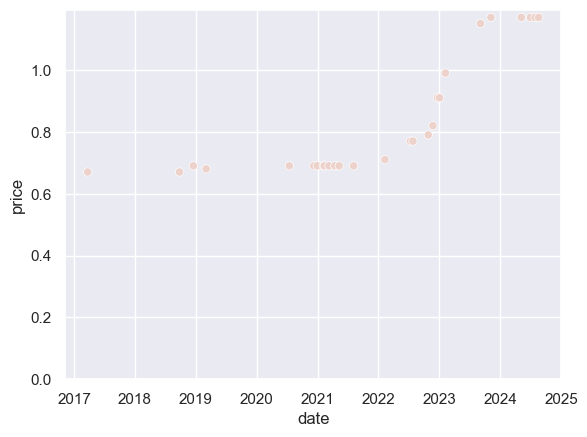

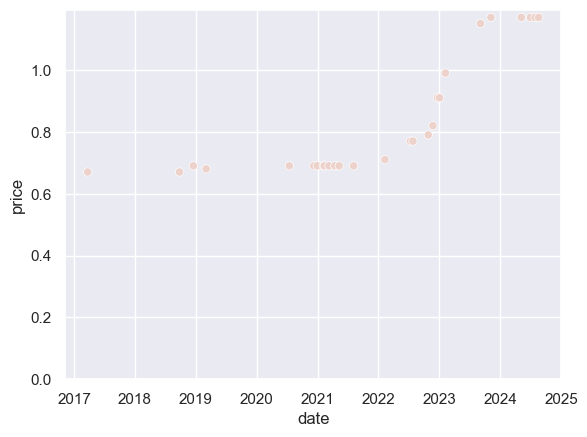

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
import random

sns.set()


def compute_fig(product_id: int):
    sub_df = df[df["product_id"] == product_id]
    
    fig, ax = plt.subplots()
    fig = sns.scatterplot(data=sub_df, x="date", y="price", hue="location_id" ,ax=ax).get_figure()
    ax.set_ylim(0, ax.get_ylim()[1])
    plt.legend([],[], frameon=False)
    return fig
    
product_ids = df["product_id"].unique()
product_id = random.choice(product_ids)
compute_fig(product_id)

In [ ]:
from tqdm import tqdm

for product_id in tqdm(product_ids):
    sub_df = df[df["product_id"] == product_id]

    fig = compute_fig(product_id)
    fig.savefig(f"figures/prices_{product_id}.png")